<a href="https://colab.research.google.com/github/rupaidutta66/Text_Extract_from_PDF/blob/feature%2FCellDetection/Cell_Detection_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import csv
# try:
#     from PIL import Image
# except ImportError:
#     import Image
import pytesseract
import re


In [ ]:
img = convert_from_path(r'/content/Hengyang-2.pdf', dpi=300 )


In [ ]:
img = np.array(img[0])

In [ ]:
image = cv2.cvtColor((img), cv2.COLOR_BGR2GRAY)

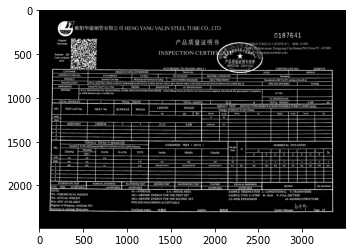

In [ ]:
thresh,img_bin = cv2.threshold(image,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [ ]:
kernel_len = image.shape[1]//100
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

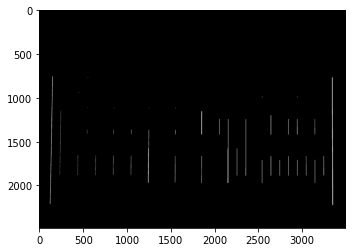

In [ ]:
image_1 = cv2.erode(img_bin, ver_kernel, iterations=5)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=5)
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

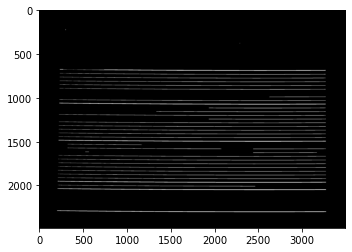

In [ ]:
image_2 = cv2.erode(img_bin, hor_kernel, iterations=5)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=5)
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

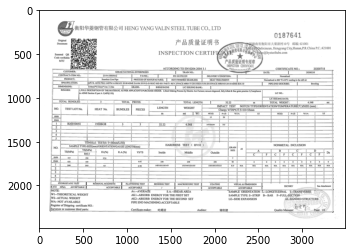

In [ ]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

bitxor = cv2.bitwise_xor(image,img_vh)
bitnot = cv2.bitwise_not(bitxor)

plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top_to_bottom" or method == "bottom_to_top":
      i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')

In [ ]:
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

In [ ]:
#Create list box to store all boxes in

box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])

In [ ]:
box

[[139, 1913, 97, 35],
 [140, 1871, 96, 38],
 [141, 1829, 95, 38],
 [141, 1786, 95, 39],
 [142, 1743, 96, 39],
 [143, 1701, 95, 39],
 [144, 1658, 95, 39],
 [145, 1488, 97, 167],
 [148, 1446, 94, 35],
 [149, 1403, 94, 39],
 [150, 1361, 94, 38],
 [150, 1319, 95, 38],
 [151, 1277, 94, 38],
 [152, 1193, 95, 80],
 [153, 1065, 96, 123],
 [156, 1023, 396, 38],
 [157, 895, 297, 126],
 [159, 852, 295, 40],
 [160, 810, 397, 41],
 [160, 767, 397, 41],
 [160, 724, 397, 42],
 [160, 681, 397, 41],
 [218, 218, 178, 5],
 [219, 223, 176, 8],
 [240, 1915, 199, 35],
 [241, 1873, 198, 38],
 [242, 1830, 197, 39],
 [243, 1788, 196, 39],
 [244, 1745, 196, 39],
 [244, 1703, 197, 38],
 [245, 1660, 197, 39],
 [246, 1575, 197, 81],
 [247, 1532, 998, 45],
 [248, 1489, 997, 45],
 [249, 1447, 299, 36],
 [249, 1404, 299, 40],
 [250, 1362, 298, 40],
 [251, 1320, 297, 40],
 [251, 1278, 297, 39],
 [253, 1066, 299, 125],
 [444, 1917, 198, 35],
 [444, 1875, 198, 38],
 [445, 1833, 197, 38],
 [445, 1790, 197, 38],
 [446, 17

In [ ]:
row=[]
column=[]
j=0

#Sorting the boxes to their respective row and column
for i in range(len(box)):

    if(i==0):
        column.append(box[i])
        previous=box[i]

    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]

            if(i==len(box)-1):
                row.append(column)

        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])

print(column)
print(row)

[[3248, 1925, 92, 34], [3248, 1883, 92, 37], [3248, 1841, 92, 37], [3248, 1799, 92, 37], [3248, 1756, 92, 37]]
[[[139, 1913, 97, 35], [140, 1871, 96, 38], [141, 1829, 95, 38], [141, 1786, 95, 39], [142, 1743, 96, 39], [143, 1701, 95, 39], [144, 1658, 95, 39], [145, 1488, 97, 167], [148, 1446, 94, 35], [149, 1403, 94, 39], [150, 1361, 94, 38], [150, 1319, 95, 38], [151, 1277, 94, 38], [152, 1193, 95, 80], [153, 1065, 96, 123], [156, 1023, 396, 38], [157, 895, 297, 126], [159, 852, 295, 40], [160, 810, 397, 41], [160, 767, 397, 41], [160, 724, 397, 42], [160, 681, 397, 41], [218, 218, 178, 5], [219, 223, 176, 8]], [[240, 1915, 199, 35], [241, 1873, 198, 38], [242, 1830, 197, 39], [243, 1788, 196, 39], [244, 1745, 196, 39], [244, 1703, 197, 38], [245, 1660, 197, 39], [246, 1575, 197, 81], [247, 1532, 998, 45], [248, 1489, 997, 45], [249, 1447, 299, 36], [249, 1404, 299, 40], [250, 1362, 298, 40], [251, 1320, 297, 40], [251, 1278, 297, 39], [253, 1066, 299, 125]], [[444, 1917, 198, 35], [4

In [ ]:
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [ ]:
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [ ]:
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [ ]:
 #from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)


                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [ ]:
outer[45]

' \x0c \x0c \x0c \x0c 332/\n\x0c \x0c  \n\n20\n\x0c Av.(J)\n\x0c'

In [ ]:
text = ''.join(outer)
text

' \x0c \x0c \x0c \x0c \x0c \x0c min |\n\x0c \x0c \x0c \x0c \x0c \x0c \x0c \x0c \x0c TOTAL BUNDLES:\n\n|\n\x0c \x0c DIMENSIONS:\n\x0c SPECIFICATION: |\n\x0c PRODUCT:\n\n \n\x0c CONTRACT-ITEM NO.:\n\x0c CUSTOMER: _\n\x0c \x0c \x0c     \x0c \x0c \x0c \x0c S00\n\x0c \x0c 415\n\x0c  \n\n| TS(MPa)\n\n \n\x0c SAMPLE TYPE-SIZE(mm)/ORIENTATION/GAUGE LENGTH(mm)\n\x0c | _____ TENSILE TEST(S Tx38mm/L/50)\n\n \n\x0c \x0c \x0c \x0c \x0c | _ B20010054\n\x0c TEST LOT No.\n\n \n\x0c     \x0c \x0c \x0c \x0c 395/\n\x0c _ 450\n\x0c 290\n\x0c Rt0.5\n\x0c ___YS(MPa)\n\x0c \x0c \x0c \x0c  \n\x0c 19308438\n\x0c HEAT No.\n\x0c \x0c     \x0c \x0c \x0c \x0c = 41)\n\x0c \x0c 278\n\x0c EL(%)\n\x0c     \x0c \x0c \x0c \x0c \x0c \x0c \x0c R.A.(%) |\n\n \n\x0c \x0c \x0c \x0c \x0c \x0c   \n           \n\nBUNDLES PIECES\n\x0c TOTAL PIECES:\n\x0c     \x0c \x0c \x0c \x0c 0.78\n\x0c 0.93\n\n \n\x0c \x0c YS/TS\n\x0c \x0c \x0c \x0c \x0c \x0c     \x0c ___BENDINGTEST |\n\x0c \x0c \x0c \x0c \x0c 148/145/119/147/\n\x0c 238\n\x0c

In [ ]:
text_1 = re.sub(r'\s+',' ', text)


In [ ]:
text_1

' min | TOTAL BUNDLES: | DIMENSIONS: SPECIFICATION: | PRODUCT: CONTRACT-ITEM NO.: CUSTOMER: _ S00 415 | TS(MPa) SAMPLE TYPE-SIZE(mm)/ORIENTATION/GAUGE LENGTH(mm) | _____ TENSILE TEST(S Tx38mm/L/50) | _ B20010054 TEST LOT No. 395/ _ 450 290 Rt0.5 ___YS(MPa) 19308438 HEAT No. = 41) 278 EL(%) R.A.(%) | BUNDLES PIECES TOTAL PIECES: 0.78 0.93 YS/TS ___BENDINGTEST | 148/145/119/147/ 238 Inside HARDNESS TEST (¢ HV10 ) C 32.22 LENGTH MACROSCOPIC TEST | 151/144/152/155/ 238 Middle 4.548 mt Wi WEIGHT TOTAL LENGTH: | 32.22. _ ACCEPTABLE COATING 1S5O/149/14 7/15 1/ 238 Outside 33334/330\' AKI(J) Charpy V/T/0°C/7.5*10x55mm 332/ 20 Av.(J) ACCEPTABLE VISUAL & DIMENSION 8.5/ " SIZE % S.A N/A N/A NONMETAL INCLUSION LE SSC/HIC/ N/A TOTAL WEIGHT: UC ISSUING DATE: LIC NO.: N/A AK2()) N/A N/A Av.) % S.A. 4.548 mt N/A N/A LE See Attachment N/A - Ds N/A | '

In [ ]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file


In [ ]:
arr

array([' \x0c \x0c \x0c \x0c \x0c \x0c min |\n\x0c \x0c \x0c \x0c \x0c \x0c \x0c \x0c \x0c TOTAL BUNDLES:\n\n|\n\x0c \x0c DIMENSIONS:\n\x0c SPECIFICATION: |\n\x0c PRODUCT:\n\n \n\x0c CONTRACT-ITEM NO.:\n\x0c CUSTOMER: _\n\x0c \x0c \x0c',
       ' ', ' ', ' ', ' ',
       ' \x0c \x0c \x0c \x0c S00\n\x0c \x0c 415\n\x0c  \n\n| TS(MPa)\n\n \n\x0c SAMPLE TYPE-SIZE(mm)/ORIENTATION/GAUGE LENGTH(mm)\n\x0c | _____ TENSILE TEST(S Tx38mm/L/50)\n\n \n\x0c \x0c \x0c \x0c \x0c | _ B20010054\n\x0c TEST LOT No.\n\n \n\x0c',
       ' ', ' ', ' ', ' ',
       ' \x0c \x0c \x0c \x0c 395/\n\x0c _ 450\n\x0c 290\n\x0c Rt0.5\n\x0c ___YS(MPa)\n\x0c \x0c \x0c \x0c  \n\x0c 19308438\n\x0c HEAT No.\n\x0c \x0c',
       ' ', ' ', ' ', ' ',
       ' \x0c \x0c \x0c \x0c = 41)\n\x0c \x0c 278\n\x0c EL(%)\n\x0c', ' ',
       ' ', ' ', ' ',
       ' \x0c \x0c \x0c \x0c \x0c \x0c \x0c R.A.(%) |\n\n \n\x0c \x0c \x0c \x0c \x0c \x0c   \n           \n\nBUNDLES PIECES\n\x0c TOTAL PIECES:\n\x0c',
       ' ', ' ', ' ', ' ',
     

In [ ]:
text = print(dataframe)
text

                                                    0  1  2  3  4
0          min |\n         TOTAL BU...            
1        S00\n  415\n  \n\n| TS(MPa)\n\n \n...            
2        395/\n _ 450\n 290\n Rt0.5\n ___Y...            
3                      = 41)\n  278\n EL(%)\n            
4           R.A.(%) |\n\n \n        \...            
5        0.78\n 0.93\n\n \n  YS/TS\n   ...            
6     ___BENDINGTEST |\n     148/145/119/147...            
7     MACROSCOPIC TEST |\n      \n\n151/144/...            
8     \n\n_ ACCEPTABLE\n COATING\n     1S5O/...            
9                  332/\n   \n\n20\n Av.(J)\n            
10    \n\nACCEPTABLE\n VISUAL & DIMENSION\n\n \n...            
11                                   N/A\n               
12       N/A\n     NONMETAL INCLUSION\n\n...            
13    \n\nSSC/HIC/\n     N/A\n     \n\nTO...            
14     

In [ ]:
import re

In [ ]:
key_value_pairs_hengyang = re.findall(r'([A-Z\s|-]+):\s+(.+)', text)
for key, value in key_value_pairs_hengyang:

  if key in key_value_pairs_hengyang:
    print(key, ':', value,'\n')

TypeError: ignored